# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [223]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [224]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# enable Python to actually display the graphs
%matplotlib inline

In [225]:
# Supress warningings
import warnings
warnings.filterwarnings("ignore")

### Understanding the structure of the data

In [226]:
# uncomment and run the following lines for Google Colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [227]:
# Load csv file into panda's dataframe
foodOrderData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PGP-AIML/Partha/python-project/foodhub_order.csv")

***Check if the data got loaded properly***

In [228]:
foodOrderData.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [229]:
foodOrderData.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [230]:
foodOrderData.shape
print("Number of rows in foodhub_orders: ", foodOrderData.shape[0])
print("Number of columns in foodhub_orders: : ", foodOrderData.shape[1])

Number of rows in foodhub_orders:  1898
Number of columns in foodhub_orders: :  9


#### Observations:
After examining the shape property of the data frame,


*   There are **1898 rows** and
*   There are **9 columns**.




### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [231]:
foodOrderData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

There are 3 different datatypes in foodhub dataset, they are:


*   float
*   int
*   object

These are the datatypes and column:

1.   **1 float** column (cost_of_the_order)
2.   **4 int** columns  (order_id, customer_id, food_preparation_time, delivery_time) and
3.   **4 object** columns (restaurant_name, day_of_the_week, rating).







### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [232]:
# Checking for missing values in data
foodOrderData.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:

There are **no** missing values in the dataset. **No** need to treat the data for missing value.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [233]:
# Statistical summary of numeric data.

foodOrderData.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [234]:
# Min, Average and Max of food prep time
print("Minimum Food prep time :", round(foodOrderData['food_preparation_time'].min(),2))
print("Average Food prep time :", round(foodOrderData['food_preparation_time'].mean(),2))
print("Maximum Food prep time :", round(foodOrderData['food_preparation_time'].max(),2))

Minimum Food prep time : 20
Average Food prep time : 27.37
Maximum Food prep time : 35


#### Observations:

* The **minimum** time taken for food preparation from the time of order is **20**.
* The **average** time taken for food preparation from the time of order is **27**.37.
* The **maximum** time taken for food preparation from the time of order is **35**.

### **Question 5:** How many orders are not rated? [1 mark]

In [235]:
# Find orders that are not rated
foodOrderData['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


In [236]:
print("Number of orders that are not rated :", foodOrderData['rating'].value_counts()[0])

Number of orders that are not rated : 736


#### Observations:

There are **736** orders that are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

####**1. Order ID**
***
*Unique ID of the order*

In [237]:
# Double Check if order_id is unique
print(f"The data in order_id column are unique - {foodOrderData['order_id'].is_unique}\n")

print("Number of unique order ids: ", foodOrderData['order_id'].nunique(),"\n")

print("Total order placed: ", foodOrderData['order_id'].nunique())

The data in order_id column are unique - True

Number of unique order ids:  1898 

Total order placed:  1898


#### Observations:

* There are 1898 order placed altogether.
* All order_id are unique.
* Since all the order_id are unique number, hystogram or boxplot will not give any insight.

####**2. Customer ID**
***
*ID of the customer who ordered the food*

In [238]:
# Check how many unique customer
foodOrderData['customer_id'].nunique()


1200

In [239]:
# Check value count for customer
cust_value_count = foodOrderData['customer_id'].value_counts()
cust_value_count.name = 'Customer Frequency'
cust_value_count.value_counts()
print(cust_value_count)
cust_value_count.value_counts()

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: Customer Frequency, Length: 1200, dtype: int64


,count
Customer Frequency,
1,784
2,267
3,83
4,33
5,19
6,6
7,4
13,1
10,1


#### Observations:

* There are 1200 unique customer who had placed orders.
* 784 Customer, about 65% placed order only once.
* Only 2 customers placed 10 or more orders.

####**3. Restaurant Name**
***
*Name of the restaurant*

In [240]:
print(f"There are {foodOrderData['restaurant_name'].nunique()} unique restaurants in the dataset.")


There are 178 unique restaurants in the dataset.


In [241]:
print("Top 10 restaurnants by number of orders:")
foodOrderData['restaurant_name'].value_counts().head(10)

Top 10 restaurnants by number of orders:


,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
RedFarm Broadway,59
RedFarm Hudson,55
TAO,49
Han Dynasty,46


#### Observations:

* There are 178 unique restaurants in the dataset.
* "Shake Shack" is the the restaurant which go most of the order (219).

#### **4. Cuisine Type**
***
*Cuisine ordered by the customer*

In [242]:
print(f"There are {foodOrderData['cuisine_type'].nunique()} cuisine type in the dataset.")

There are 14 cuisine type in the dataset.


In [243]:
foodOrderData['cuisine_type'].value_counts()

,count
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77
Indian,73
Middle Eastern,49
Mediterranean,46
Thai,19


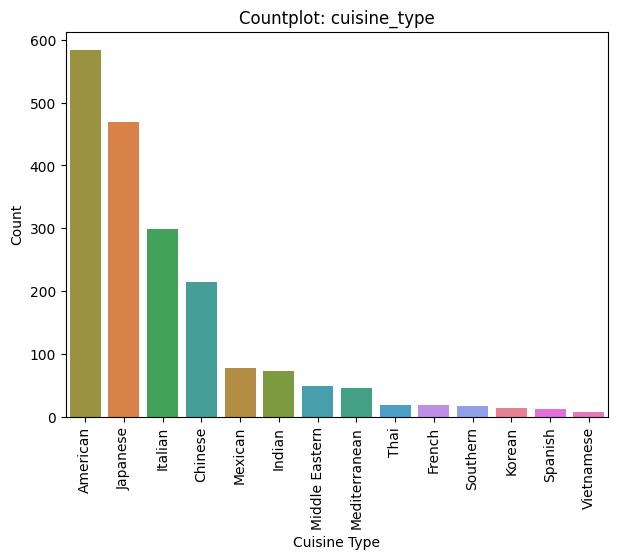

In [244]:
plt.figure(figsize=(7,5))
plt.title('Countplot: cuisine_type')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
sns.countplot(data=foodOrderData, x='cuisine_type',hue='cuisine_type', order=foodOrderData['cuisine_type'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

#### Observation

* There are 14 different cuisines in the data set.
* American cuisine has most number of orders (584) followed by Japanese cuisine (470)
* Italian, Chinese are also in the top 4 cuisines.
* Rest of the cuisine only received less than 100 orders each.
* Vietnamese followed by Spanish cuisine has least number of orders.

####**5. Cost of the order**
***
*Cost of the order*

In [245]:
print(f"The highest cost order is {foodOrderData['cost_of_the_order'].max()}")
print(f"The lowest cost order is {foodOrderData['cost_of_the_order'].min()}")
print(f"The average cost of order is {foodOrderData['cost_of_the_order'].mean().round(2)}")
print(f"The median cost of order is {foodOrderData['cost_of_the_order'].median()}")

The highest cost order is 35.41
The lowest cost order is 4.47
The average cost of order is 16.5
The median cost of order is 14.14


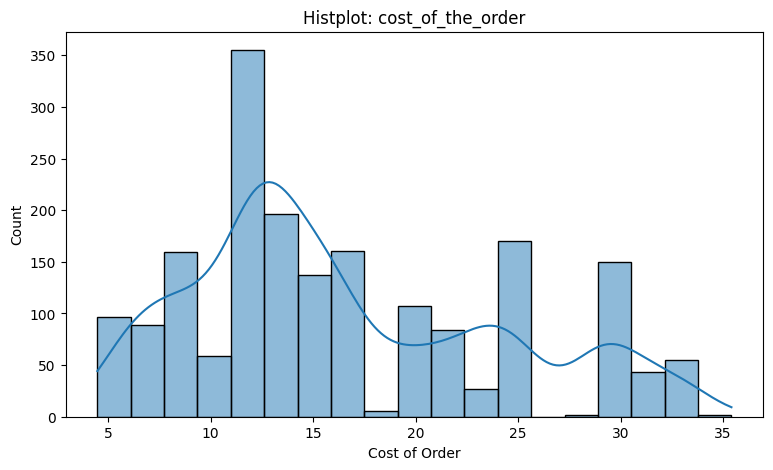

In [246]:
plt.figure(figsize=(9,5))
plt.title('Histplot: cost_of_the_order')
plt.xlabel('Cost of Order')
plt.ylabel('Count')
sns.histplot(data=foodOrderData, x='cost_of_the_order', kde=True)
plt.show()

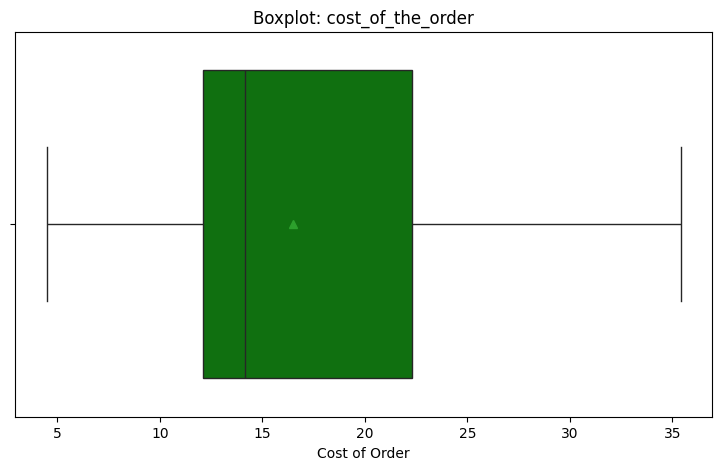

In [247]:
plt.figure(figsize=(9,5))
plt.title('Boxplot: cost_of_the_order')
plt.xlabel('Cost of Order')
sns.axes_style('whitegrid')
sns.boxplot(data=foodOrderData, x='cost_of_the_order',color='green',showmeans=True)
plt.show()

#### Observation

* Histplot shows that the data is skewed to the right. There is a slight peak around 25 and 30.
* The boxplot shows that there are no outliers.
* The highest cost order is 35.41
* The lowest cost order is 4.47
* The average cost of order is 16.5
* The median cost of order is 14.14

####**6. Day of the Week**
***
*Indicates whether the order is placed on a weekday or weekend*

In [248]:
foodOrderData['day_of_the_week'].nunique()

2

In [249]:
foodOrderData['day_of_the_week'].value_counts()

,count
day_of_the_week,
Weekend,1351
Weekday,547


In [250]:
percentages = (foodOrderData['day_of_the_week'].value_counts() / foodOrderData.shape[0]) * 100
percentages = round(percentages, 2)
print(percentages)

day_of_the_week
Weekend    71.18
Weekday    28.82
Name: count, dtype: float64


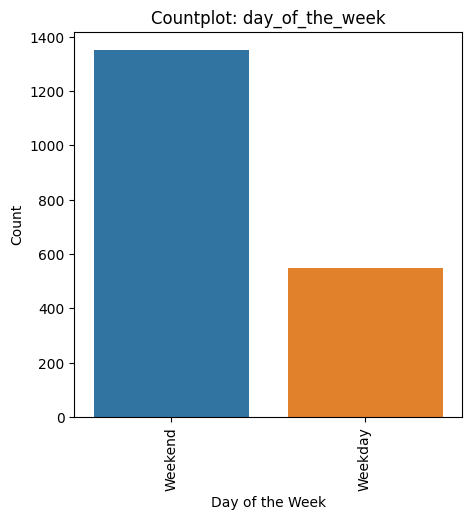

In [251]:
plt.figure(figsize=(5,5))
plt.title('Countplot: day_of_the_week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
sns.countplot(data=foodOrderData, x='day_of_the_week',hue='day_of_the_week', order=foodOrderData['day_of_the_week'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

#### Observation
* There way more orders in the weekend than the weekdays.
* 71.18% of the orders are weekend orders.

####**7. Rating**
***
*Rating given by the customer out of 5*

In [252]:
print(f"Unique Ratings - {foodOrderData['rating'].nunique()}\n\n")
print(f"Rating value counts - \n\n{foodOrderData['rating'].value_counts()}\n")
print(f"Rating percents - \n\n{round(100*foodOrderData['rating'].value_counts()/foodOrderData.shape[0],2)}\n")


Unique Ratings - 4


Rating value counts - 

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

Rating percents - 

rating
Not given    38.78
5            30.98
4            20.34
3             9.91
Name: count, dtype: float64



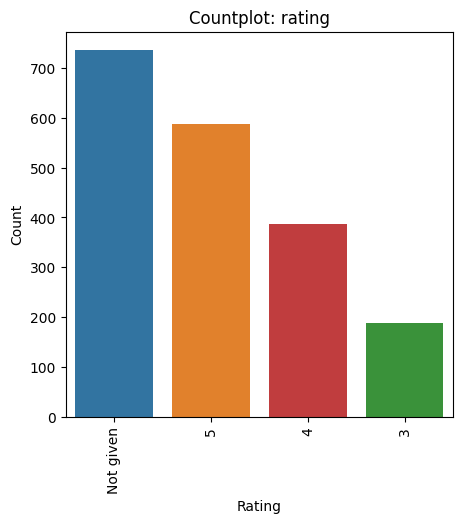

In [253]:
plt.figure(figsize=(5,5))
plt.title('Countplot: rating')
plt.xlabel('Rating')
plt.ylabel('Count')
sns.countplot(data=foodOrderData, x='rating',hue='rating', order=foodOrderData['rating'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

#### Observation

* Most of the customer did not rate the order, 38.78% of them.
* The customer who had rated had given the highest rating of 5, about 30.98%

####**8. Food Preparation Time**
***
*Time (in minutes) taken by the restaurant to prepare the food.*


In [254]:
print(f"The longest preparation time is {foodOrderData['food_preparation_time'].max()}")
print(f"The shortest preparation time is {foodOrderData['food_preparation_time'].min()}")
print(f"The average preparation time is {foodOrderData['food_preparation_time'].mean().round(2)}")
print(f"The median preparation time is {foodOrderData['food_preparation_time'].median()}")

The longest preparation time is 35
The shortest preparation time is 20
The average preparation time is 27.37
The median preparation time is 27.0


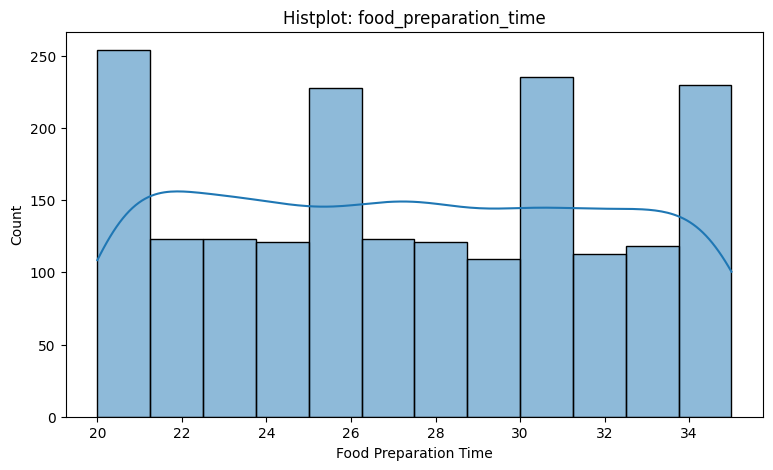

In [255]:
plt.figure(figsize=(9,5))
plt.title('Histplot: food_preparation_time')
plt.xlabel('Food Preparation Time')
plt.ylabel('Count')
sns.histplot(data=foodOrderData, x='food_preparation_time', kde=True)
plt.show()

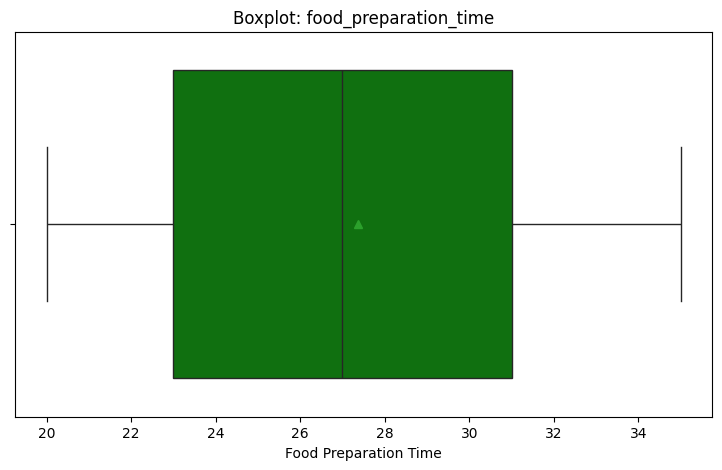

In [256]:
plt.figure(figsize=(9,5))
plt.title('Boxplot: food_preparation_time')
plt.xlabel('Food Preparation Time')
sns.axes_style('whitegrid')
sns.boxplot(data=foodOrderData, x='food_preparation_time',color='green', showmeans=True)
plt.show()

#### Observation
* The food preparation time is evenly distributed.
* The preparation time for all order are fairly close to the average time.
* There are no outliers.
* The longest preparation time is 35
* The shortest preparation time is 20
* The average preparation time is 27.37
* The median preparation time is 27.0

####**9. Delivery Time**
***
*Time (in minutes) taken by the delivery person to deliver the food package.*


In [257]:
print(f"The longest delivery time is {foodOrderData['delivery_time'].max()}")
print(f"The shortest delivery time is {foodOrderData['delivery_time'].min()}")
print(f"The average delivery time is {foodOrderData['delivery_time'].mean().round(2)}")
print(f"The median delivery time is {foodOrderData['delivery_time'].median()}")

The longest delivery time is 33
The shortest delivery time is 15
The average delivery time is 24.16
The median delivery time is 25.0


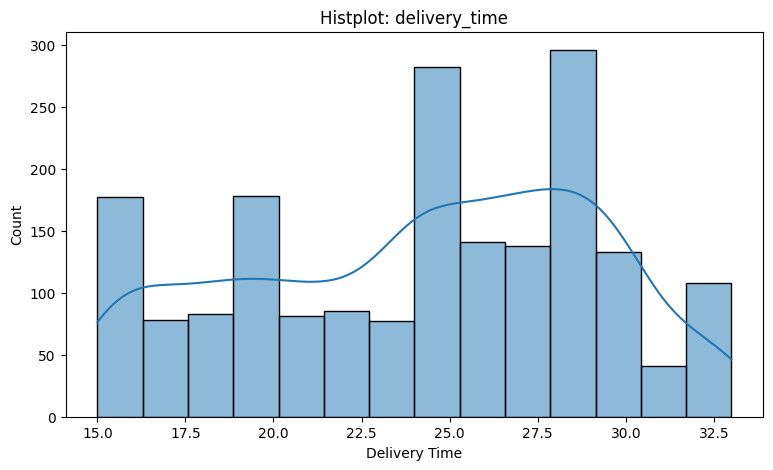

In [258]:
plt.figure(figsize=(9,5))
plt.title('Histplot: delivery_time')
plt.xlabel('Delivery Time')
plt.ylabel('Count')
sns.histplot(data=foodOrderData, x='delivery_time', kde=True)
plt.show()

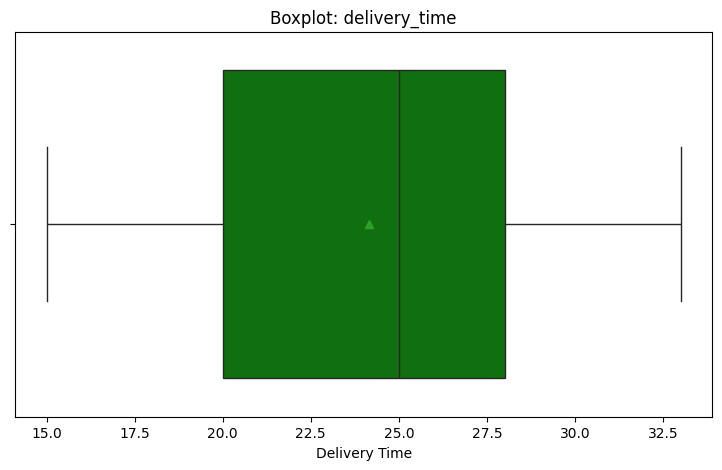

In [259]:
plt.figure(figsize=(9,5))
plt.title('Boxplot: delivery_time')
plt.xlabel('Delivery Time')
sns.axes_style('whitegrid')
sns.boxplot(data=foodOrderData, x='delivery_time',color='green', showmeans=True)
plt.show()

#### Observation
* The delivery time is slighly skewed to left.
* There are no outliers.
* Most of the orders where delivered between 20 and 28min
* The longest delivery time is 33
* The shortest delivery time is 15
* The average delivery time is 24.16


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [260]:
print(f"Top 5 restaurnants by number of orders: \n\n{foodOrderData['restaurant_name'].value_counts().head(5)}")


Top 5 restaurnants by number of orders: 

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:

Top 5 restaurnants by number of orders:

**Restaurants**
***
|Sno|Restaurant|# Orders|
|--|--|--|
|1. |Shake Shack |                 219|
|2. |The Meatball Shop|            132|
|3. |Blue Ribbon Sushi            |119|
|4. |Blue Ribbon Fried Chicken     |96|
|5. |Parm                          |68|


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [261]:
print(f"{foodOrderData[foodOrderData['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().index[0]} cusine is the popular cusine on the weekends.")

American cusine is the popular cusine on the weekends.


#### Observations:
* American cusine is the popular cusine on the weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [262]:
print(f"{((foodOrderData['cost_of_the_order'] > 20).sum() / foodOrderData.shape[0] * 100):.2f}% of orders cost more than $20")

29.24% of orders cost more than $20


#### Observations:
* 29.24% of orders cost more than $20

### **Question 10**: What is the mean order delivery time? [1 mark]

In [263]:
print(f"The mean order delivery time is {foodOrderData['delivery_time'].mean().round(2)}")

The mean order delivery time is 24.16


#### Observations:
* The mean order delivery time is 24.16

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [264]:
# Check value count for customer
print(foodOrderData['customer_id'].value_counts().head(3))


customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:

The top 3 customers and their order count:

|*Customer ID*|*# of Orders*|
|-------------|------------:|
|52832    |13|
|47440    |10|
|83287    | 9|

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### ***Correlation among numerical variables***
***


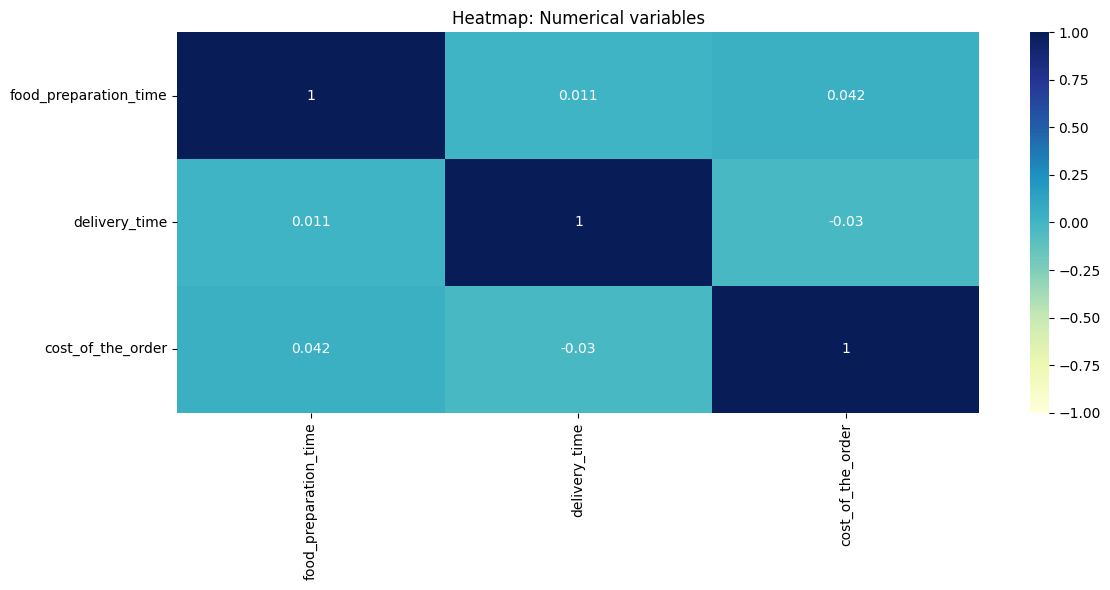

In [265]:
# There are 5 numeric variables. Since order_id and customer_id are unique identifiers, I am leaving them.
num_cols = ['food_preparation_time', 'delivery_time', 'cost_of_the_order']
plt.figure(figsize=(12,6))
plt.title('Heatmap: Numerical variables')
sns.heatmap(foodOrderData[num_cols].corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.tight_layout()
plt.show()

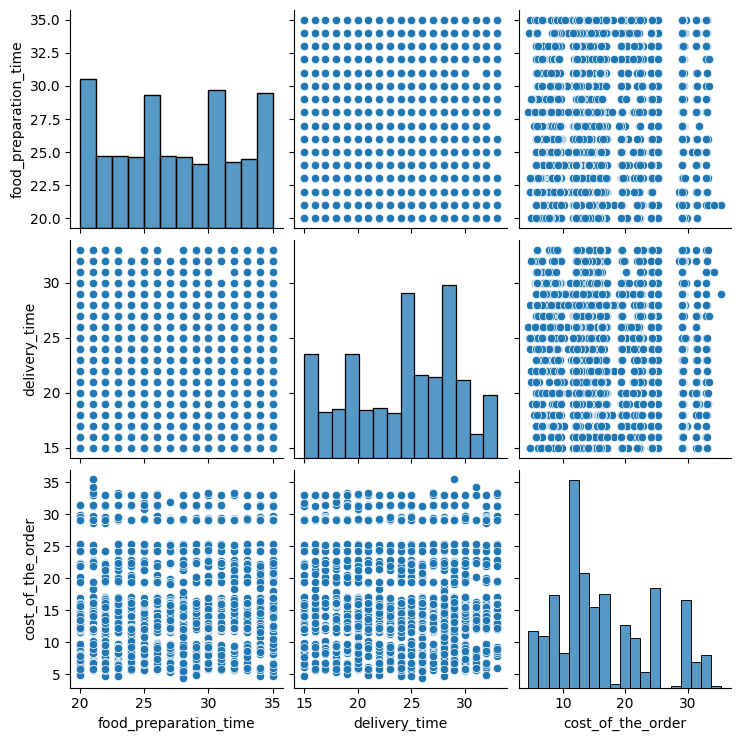

In [266]:
#Pair plot
sns.pairplot(data=foodOrderData[num_cols])
plt.show()

#### Observation
* There is only slight correlation between numerical variables, not enough to draw definite conslusions on how one affect another.


#### ***Cuisine Type Vs Cost of Order***
***


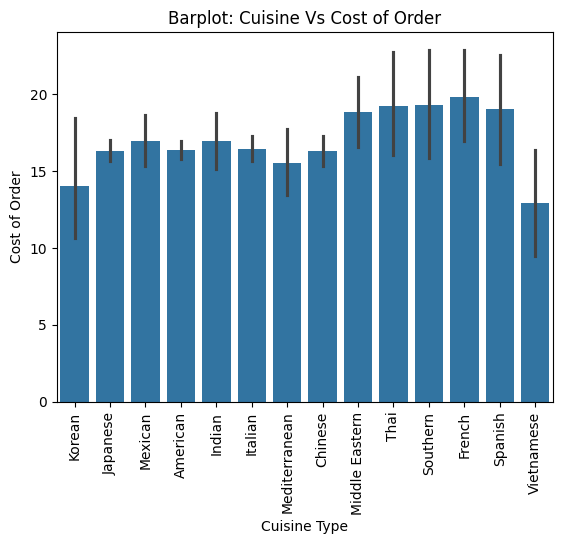

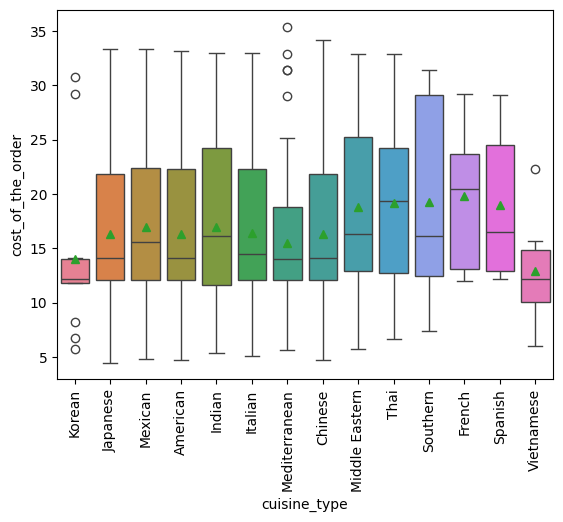

In [267]:
# Relationship between Cuisine type and Cost of order
plt.title('Barplot: Cuisine Vs Cost of Order')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of Order')
sns.barplot(data=foodOrderData, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=90)
plt.show()
print("\n")
sns.boxplot(data=foodOrderData, x='cuisine_type', y='cost_of_the_order', showmeans=True, hue='cuisine_type')
plt.xticks(rotation=90)
plt.show()

#### Observation
* The average cost of French Cuisine ranks first followed by Southern Cuisine
* Vietnamese cuisine cost less.
* There are some outliers for Mediterranean, Korean and Vietnames Cusine.

#### ***Cusine Type Vs Day of the Week***
***

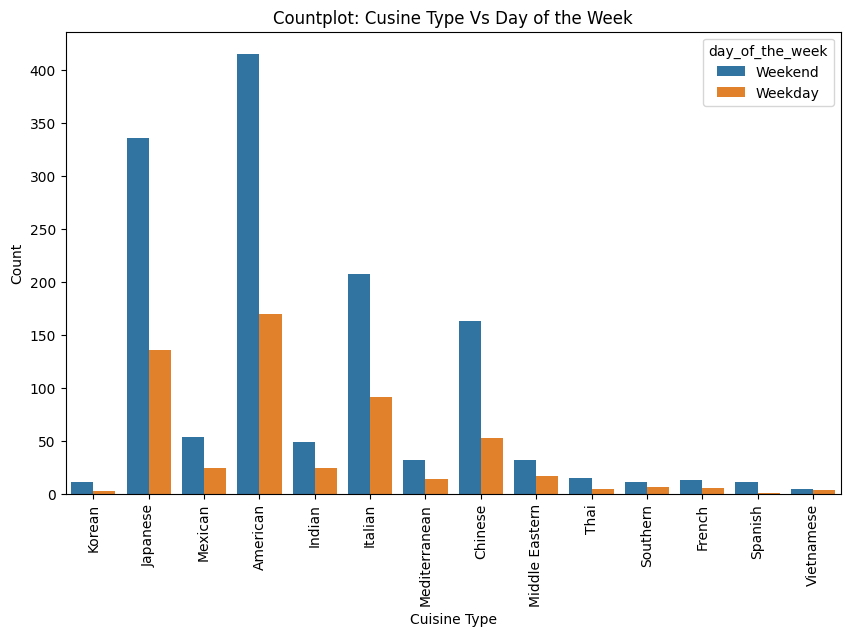

In [268]:
# Create a count plot
plt.figure(figsize=(10, 6))
plt.title('Countplot: Cusine Type Vs Day of the Week')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
sns.countplot(data=foodOrderData, x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90)
# Display the chart
plt.show()

#### Observation
* The weekend orders are more for all the cuisine than the weekday orders

### ***Cuisine Type Vs Food Preparation Time***
***

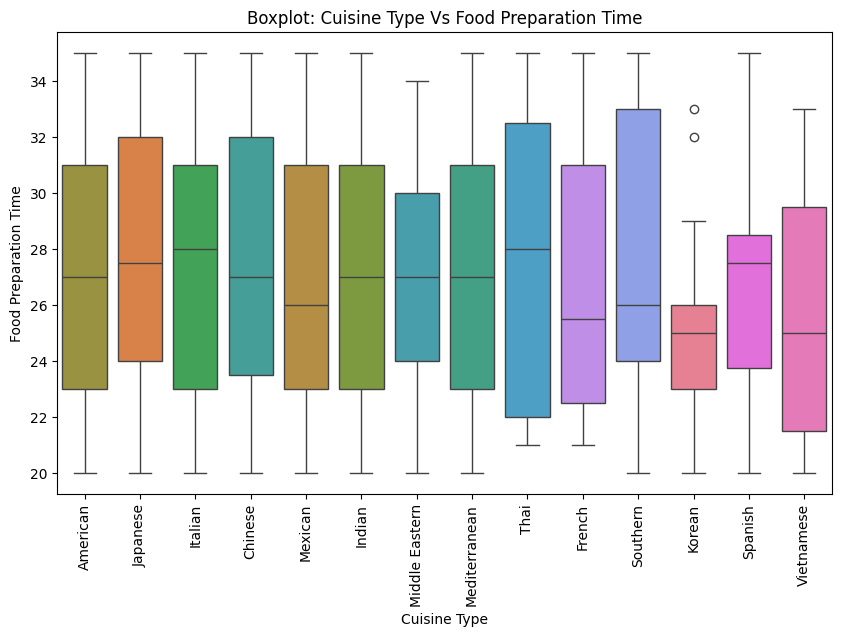

In [269]:
# Relation between Cuisine Type and Food Preparation time.
plt.figure(figsize=(10, 6))
plt.title('Boxplot: Cuisine Type Vs Food Preparation Time')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time')
sns.boxplot(data=foodOrderData, x='cuisine_type', y='food_preparation_time', hue='cuisine_type', order=foodOrderData['cuisine_type'].value_counts().index)
plt.xticks(rotation=90)
plt.show()


#### Observation
* The average food preparation time for Korean cuisine is the least (25.46) inspight of the outliers. 75% of orders took only 26min.
* Most cuisines have median preparation times between 25-30 minutes.
* Thai cuisine has largest variability with wide box and wishkers.

#### ***Day of the Week Vs Delivery Time***
***

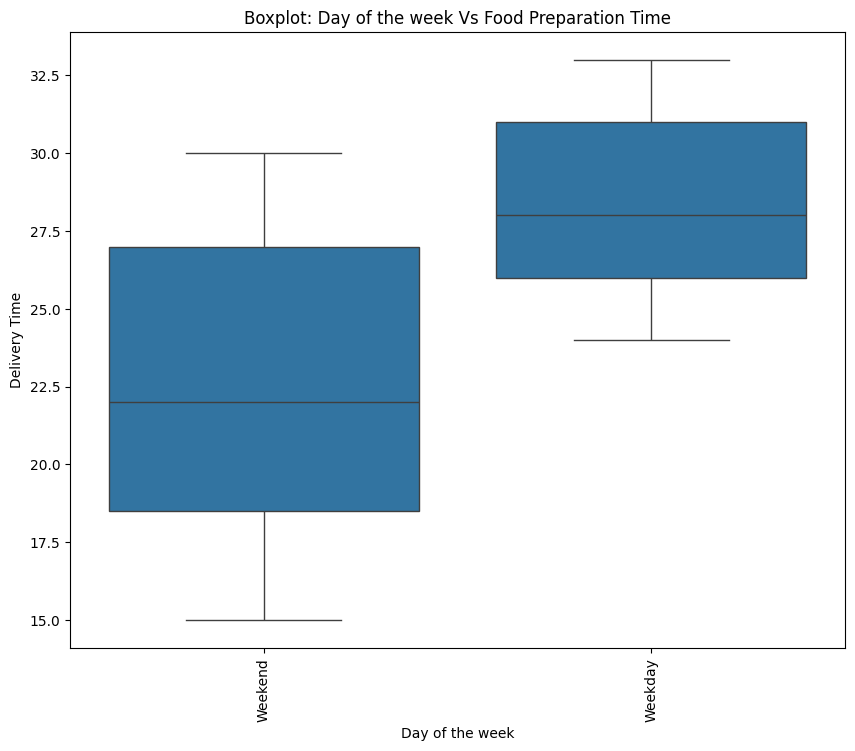

In [270]:
# Relation between Day of the week and Delivery Time

plt.figure(figsize=(10,8))
sns.boxplot(data=foodOrderData, x='day_of_the_week', y='delivery_time')
plt.title('Boxplot: Day of the week Vs Food Preparation Time')
plt.xlabel('Day of the week')
plt.ylabel('Delivery Time')
plt.xticks(rotation=90)
plt.show()

#### Observation
* Weekday delivery time is longer than the weekend delivery time. There are no outliers.

#### ***Rating Vs Cuisine Type***
***

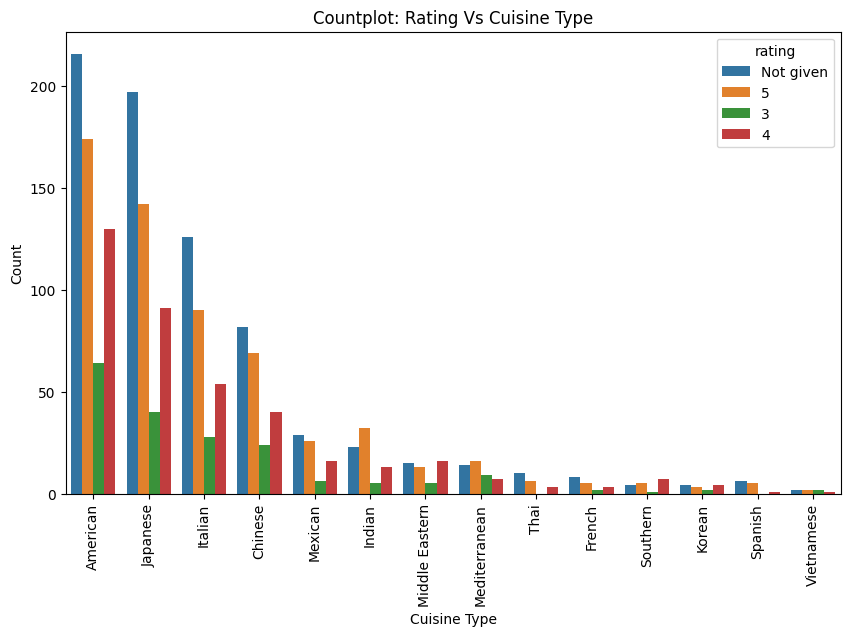

In [271]:
# Relation between Rating and Cuisine Type
plt.figure(figsize=(10, 6))
plt.title('Countplot: Rating Vs Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
sns.countplot(data=foodOrderData, x='cuisine_type', hue='rating', order=foodOrderData['cuisine_type'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

#### Observation
* Many customer did not rate the order. The customers who had rated give more 5 rating.
* American cuisine has highest overall rating (other than 'Not given'), got more 5 rating

#### ***Rating Vs Cost of Order***
***

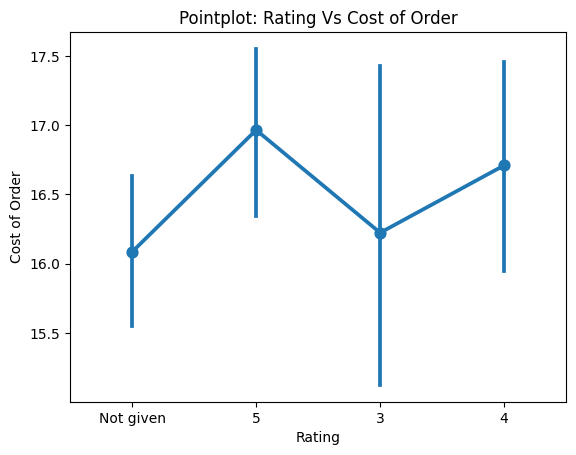

In [272]:
sns.pointplot(data=foodOrderData, x='rating', y='cost_of_the_order')
plt.title('Pointplot: Rating Vs Cost of Order')
plt.xlabel('Rating')
plt.ylabel('Cost of Order')
plt.show()

#### Observation
* Orders between 16.25 - 17.50 got more 5 rating
* 3 rating was provided to a large range of variability.

#### ***Rating Vs Food Preparation Time***
***

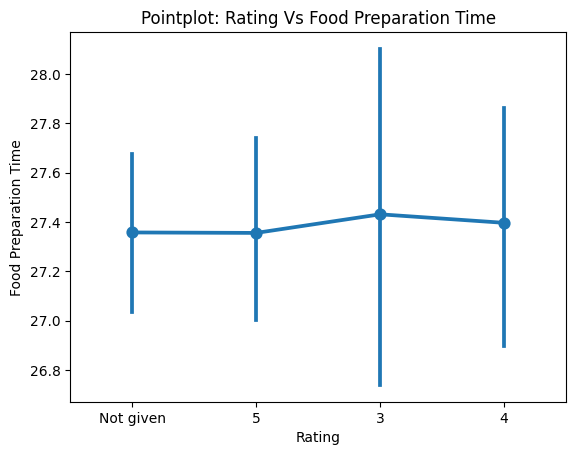

In [273]:
# Relation between rating and food prep time.
sns.pointplot(data=foodOrderData, x='rating', y='food_preparation_time')
plt.title('Pointplot: Rating Vs Food Preparation Time')
plt.xlabel('Rating')
plt.ylabel('Food Preparation Time')
plt.show()

#### Observation
* There are no clear linear relationship between rating and food preparation time.

#### ***Rating Vs Delivery Time***
***

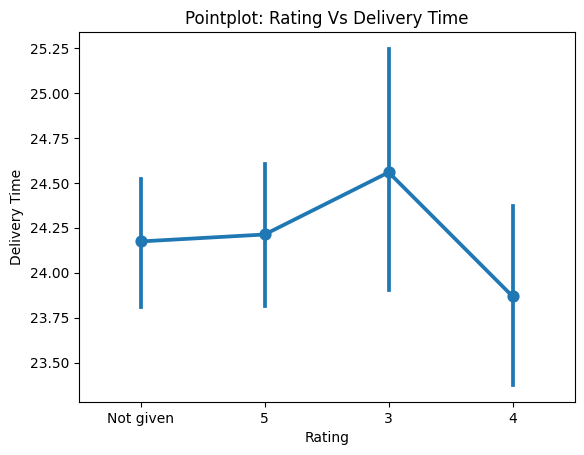

In [274]:
# Relation between Rating and Delivery Time
sns.pointplot(data=foodOrderData, x='rating', y='delivery_time')
plt.title('Pointplot: Rating Vs Delivery Time')
plt.xlabel('Rating')
plt.ylabel('Delivery Time')
plt.show()

#### Observation
* Rating 3 have the highest average delivery time and the range of variablility is large.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [275]:
#First filter out the rows where rating is 'Not given' and then change the datatype of rating to int.
fodRated = foodOrderData[foodOrderData['rating'] != 'Not given'].copy()
fodRated['rating'] = fodRated['rating'].astype(int)

#Create a dataframe with retaurant name, rating count and rating average
restRatingInfo = fodRated.groupby('restaurant_name').agg({'rating': ['count', 'mean']}).reset_index()
restRatingInfo.columns = ['restaurant_name', 'rating_count', 'avg_rating']

# Get the rows from restRatingInfo DataFrame where rating_count > 50 and avg_rating > 4
filtered_data = restRatingInfo[(restRatingInfo['rating_count'] > 50) & (restRatingInfo['avg_rating'] > 4)].sort_values(by='avg_rating', ascending=False).reset_index(drop=True)

filtered_data.head()


,restaurant_name,rating_count,avg_rating
0,The Meatball Shop,84,4.511905
1,Blue Ribbon Fried Chicken,64,4.328125
2,Shake Shack,133,4.278195
3,Blue Ribbon Sushi,73,4.219178


#### Observations:
* The Resturants that qualifies for the promotional offers are:

|Sno|*Resturant Name*|*Rating Count*|*Average Ratings*|
|---:|:-------------|--------:|-----------|
|1|	The Meatball Shop|	84|	4.511905|
|2|	Blue Ribbon Fried Chicken|	64|	4.328125|
|3|	Shake Shack	|133	|4.278195|
|4|	Blue Ribbon Sushi	|73	|4.219178|



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [276]:
# Function to calculate the net revenue generated by the company
def calculate_revenue(cost_of_order):

    if cost_of_order > 20:
        return cost_of_order * 0.25
    elif cost_of_order > 5:
        return cost_of_order * 0.15
    else:
        return 0


# Apply the function to the cost_of_the_order column of the dataframe
netRevenue = foodOrderData['cost_of_the_order'].apply(calculate_revenue).sum()
print(f"The net revenue generated by the company across all orders is ${netRevenue:.2f}")


The net revenue generated by the company across all orders is $6166.30


#### Observations:
* The net revenue generated by the company across all orders is $6166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [277]:
#Total Time
foodOrderData['total_time'] = foodOrderData['food_preparation_time'] + foodOrderData['delivery_time']

print(f"{((len(foodOrderData[foodOrderData['total_time'] > 60]) / len(foodOrderData)) * 100):.2f} percentage of orders take more that 60 minutes to get delivered.")

10.54 percentage of orders take more that 60 minutes to get delivered.


#### Observations:
* 10.54 percentage of orders take more that 60 minutes to get delivered.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [278]:
# Analyze delivery time
delivery_time_weekday = foodOrderData[foodOrderData['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
delivery_time_weekend = foodOrderData[foodOrderData['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
delivery_time_mean = foodOrderData.groupby('day_of_the_week')['delivery_time'].mean().round(2)
print(delivery_time_mean)

day_of_the_week
Weekday    28.34
Weekend    22.47
Name: delivery_time, dtype: float64


#### Observations:
* The mean delivery time is longer during weekday (28.34) when compared to weekends (22.47)

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* The number of orders placed during the weekend is significantly higher than the orders palced during the week end.
* 10 Restaurants got close to half the orders placed in the app.
* 65% of the customer had used the service only once. Very few used the service 10 or more times (2 Customer)
* High percentage of the customer (38.78) did not provide ratings.
* The mean time to deliver the order which is food_preparation_time and delivery_time is higher over the weekday when compared to weekends. There is no variation in food_preparation time by day of the week. Delivery time is attributing to the longer time for the food to reach customer. It could be attributed to traffic (we do not have that information)
*  There is only slight correlation between food_preparation_time, delivery_time, cost_of_the_order

### Recommendations:

*  Incentive customer to rate the order.
*  Try to increase order over the weekdays by giving coupons or discount on order.
* Improve the delivery time on weekdays.
* Encouraging customer to rate the order would give us better understaning of the quality of the restaurant, based on which the restaurant will be highlighted in the app to increase traffic for that restaurant.

---